<a href="https://www.inove.com.ar"><img src="https://github.com/InoveProyectos/charla_git/raw/master/inove.jpg" width="1000" align="center"></a>
<h1><center>Hello world!</center></h1>
<h4>Sobre este ejemplo</h4>
En este ejemplo se ejemplifica como resolver cuanto vale el valor de las propiedades de una determinada zona utilizando machine linearning.

In [ ]:
import shutil
try:
  f = open("/content/gibioplot/gibioplot.py")
except:
  !git clone https://github.com/HectorInove/gibioplot.git
try:
  shutil.copy("/content/gibioplot/gibioplot.py", "/content/gibioplot.py")
except:
  pass

Cloning into 'gibioplot'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import gibioplot
from sklearn import linear_model

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Recolectar datos

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3dp4dMGFr2D00UyD0240fBNyrzptD5onOf1wkHioTvEo-RpDmNEP61ssGPS4IiSKtDEwUHaU8krqeFZi3mjkiQDE72dtJy9zxptu48TYzfnbQp-O1WFZ0LFaXDG-jIz01IQyw2fZJzEFhnk_zK-glgP=w1366-h133-no?authuser=0" width="1000" align="center"></center>
Descargamos el dataset de alquiler de departamentos

In [ ]:
#!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Mendoza
!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal

--2020-09-24 15:39:15--  http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal
Resolving inove.pythonanywhere.com (inove.pythonanywhere.com)... 35.173.69.207
Connecting to inove.pythonanywhere.com (inove.pythonanywhere.com)|35.173.69.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110873 (108K) [text/csv]
Saving to: ‘propiedades.csv’

propiedades.csv     100%[===================>] 108.27K   423KB/s    in 0.3s    

2020-09-24 15:39:29 (423 KB/s) - ‘propiedades.csv’ saved [110873/110873]



# Procesar datos

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3ecH_bbd3CY23v8dqfIsuoE1FT7dDeRqxlG4Ti4RzKkOqAHMTD8ukvX7wx_G2PkKFQjNeoGGtL3xoqhCqfKCSdk1lE_2FuTiQaV2jDy3_fZeVbBxgEhtVwGnoLhBfQyb36KZxHPn0puUpJV825MBkQJ=w1366-h133-no?authuser=0" width="1000" align="center"></center>

In [ ]:
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isnull().sum()
des.loc['%Nan'] = (df.isnull().mean())*100
des

,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,497.000000,497.000000,497.000000,497.000000,495.000000,493.000000
mean,248.000000,-34.435210,-58.350448,35192.064386,67.442485,2.160243
std,143.615807,3.697256,3.521822,47710.037337,67.655392,1.533064
min,0.000000,-38.001750,-120.740135,27.000000,0.000000,0.000000
25%,124.000000,-34.605970,-58.439583,3500.000000,35.500000,1.000000
50%,248.000000,-34.594700,-58.418290,25000.000000,46.000000,2.000000
75%,372.000000,-34.580566,-58.392807,40000.000000,70.000000,3.000000
max,496.000000,47.751076,-34.588875,450000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.402414,0.804829


In [ ]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df[df['m2'].notna()]
df_clean = df_clean[df_clean['ambientes'].notna()]

# Explorar datos

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3ePJ3-PFgVLwddhdqRi7z7VRo8j3r6LBSRPzWNek5805rJeEdWJKIbAKGj133aGArHgu1oe8-IDj9ET8FtAW0R5GrUOcPzgG0nnUFhfIRyug0VQ_2DwNB_zmMuReBy60ExzOQprBc8us4HlthdvRtx6=w1366-h133-no?authuser=0" width="1000" align="center"></center>

In [ ]:
print('Cantidad de departamentos en observacion:', df_clean.shape[0])
df_clean.head()

Cantidad de departamentos en observacion: 493


,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_09_24,-34.611270,-58.363780,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_09_24,-34.586830,-58.439266,https://departamento.mercadolibre.com.ar/MLA-8...,Loft Duplex Palermo Hollywood Amoblado Alqui...,Departamento,79000.0,ARS,70.0,2.0
2,2,2020_09_24,-34.601160,-58.376804,https://departamento.mercadolibre.com.ar/MLA-8...,Dueño Alquila 1 Amb. Amoblado - Caba - Zona:...,Departamento,23500.0,ARS,30.0,1.0
3,3,2020_09_24,-34.548042,-58.466156,https://departamento.mercadolibre.com.ar/MLA-8...,Departamento Equipado Y Amueblado Muy Buen Estado,Departamento,80000.0,ARS,130.0,5.0
4,4,2020_09_24,-34.612488,-58.426605,https://departamento.mercadolibre.com.ar/MLA-8...,"Alquiler Temporario , Zona Hospital Italiano",Departamento,2000.0,ARS,60.0,2.0


## Nos quedamos solamente con aquellas filas que el precio haya sido informado en pesos Argentinos

In [ ]:
df_ars = df_clean[df_clean['moneda'] == 'ARS']
print('Cantidad de departamentos en observacion:', df_ars.shape[0])
gibioplot.boxplot(df_ars['m2'], 'Metros cuatrados')

Cantidad de departamentos en observacion: 423


## Eliminar los elementos que se van fuera del rango de análisis

In [13]:
# Nos quedamos solamente con los deparamentos menor a 200m2
propiedades = df_ars[df_ars['m2'] < 200]
gibioplot.boxplot(propiedades['m2'], 'Metros cuatrados')
print('Cantidad de departamentos en observacion:', propiedades.shape[0])

Cantidad de departamentos en observacion: 412


# Entrenar modelo

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3csSQnxbKYYltM7w3bryOXpVvhrxI8PZ-xHKtEleb8SiwPjx_vNiCIfYQUVVUtCUz5zyhyCGqCjj9mWlHcXqmSZpHL5lrQrCcnbg0tRQiWYmATPeAzVKVrQGCA22rH7R9QrQsOFjeXmw3z4a17k_GTn=w1366-h133-no?authuser=0" width="1000" align="center"></center>

In [ ]:
# Calcular y visualizar le prediccion de costos por m2
regr = linear_model.LinearRegression()
#x = np.asanyarray(propiedades[['ambientes','m2']])
x = np.asanyarray(propiedades[['m2']])
y = np.asanyarray(propiedades['precio'])
regr.fit(x, y)
#y_hat= regr.predict(propiedades[['ambientes','m2']])
y_hat= regr.predict(propiedades[['m2']])

# Validar modelo

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3cak4pQwIT8LrDUfrv0XXdf9MfEDbCytI3Yttzzd8BG0AyqJ74FpFe5kVMZ0UoKguSjr3-_qKe1Qg2eWEk5YalKmtcwGFV5OS2CmmoVsEPIRpUZeg4SzIDrcQDRTGNP-9RPT4q1VVXrHtCdCZDYrfgW=w1366-h133-no?authuser=0" width="1000" align="center"></center>

In [ ]:
error_medio = np.mean(np.absolute((y_hat - y)/y))
print("Error medio: %.2f" % error_medio)
gibioplot.plot_meter(error_medio,10)

Error medio: 5.94


# Utilizar modelo

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cCImYtu1CcKuITmTpV7hyJmrEt_8ADIqZiqlksAyNwCvcwR8sDZLQl54gmo4sobCgb3vpuzjWAFDkBh6cT33oBYTMJMyltD25Q8einZ37Gx_9gsCLI50iBX1wo3fz5c0BaedWiyJs3MdHotbxnkSjg=w1366-h133-no?authuser=0" width="1000" align="middle"
></div>

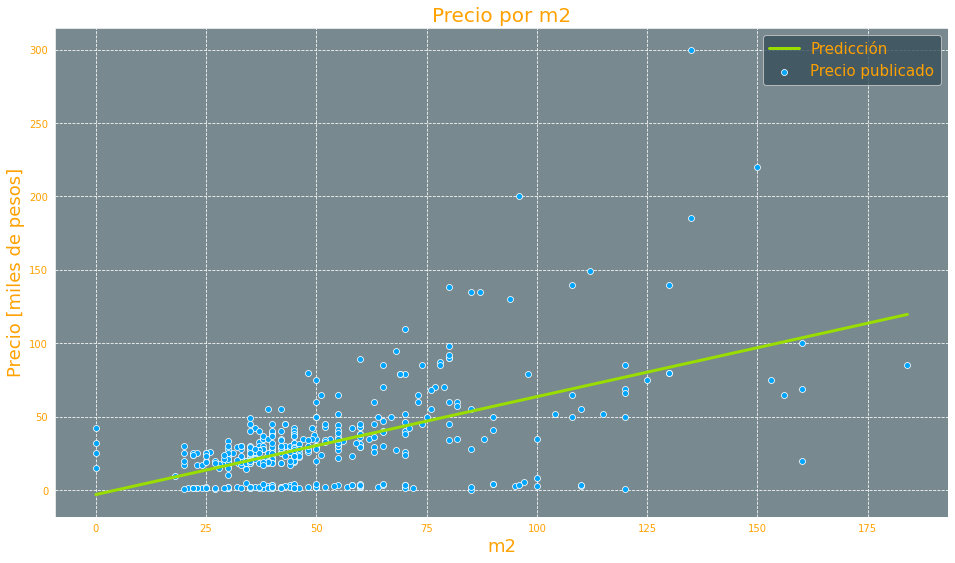

In [ ]:
gibioplot.plot_dot_line(propiedades['m2'],propiedades['precio'],y_hat)

<center><img src="https://lh3.googleusercontent.com/pw/ACtC-3c0b9wdQXhFVvYu-h9-AsPEg621I8En-CINRW5eJhYJweohC0gQ-8j-ZftxoZ6TXZWQbFRoLxNCH_xLHjnEEUMMKg9k72CQU8Zyd2if6CFBPWV_8umCQXI543v6o1cOhk5001p-pKe8wIOb2eSa2KN7=w1366-h133-no?authuser=0" width="1000" align="center"></center>